# Analyse of Olympics Result Through Data Science





## Author: Caroline Santos

# Swimming results

In this section, the results of swimming was explored. Which country won most of the golden,silver and bronze medals at the olympic history? How about the styles? There is a country that domine some kind of style? These few questions will be answered in this documentation.



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#dataset from kaggle athlete_events.csv
data = pd.read_csv('../athlete_events.csv')
selection = selection = (data['Sport'] =='Swimming') 
swimming_data = data[selection]
swimming_data.to_csv('data/swimming_data.csv',index=False)

## Golden medals
In this section, the distribution of the golden medals was analyzed


In [4]:
data = pd.read_csv('data/swimming_data.csv')
selection = (data['Medal'] == 'Gold')


In [5]:
swimming_golden_data = data[selection]
swimming_golden_data.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
123,980,"Rebecca ""Becky"" Adlington",F,19.0,179.0,70.0,Great Britain,GBR,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Women's 400 metres Freestyle,Gold
124,980,"Rebecca ""Becky"" Adlington",F,19.0,179.0,70.0,Great Britain,GBR,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Women's 800 metres Freestyle,Gold
129,1017,Nathan Ghar-Jun Adrian,M,19.0,198.0,100.0,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold
130,1017,Nathan Ghar-Jun Adrian,M,23.0,198.0,100.0,United States,USA,2012 Summer,2012,Summer,London,Swimming,Swimming Men's 100 metres Freestyle,Gold
132,1017,Nathan Ghar-Jun Adrian,M,23.0,198.0,100.0,United States,USA,2012 Summer,2012,Summer,London,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold


In [6]:
golden_medal = swimming_golden_data['NOC'].value_counts()
golden_medal = golden_medal.to_frame().reset_index()
golden_medal.columns = ['Country','total']
total_golden_medal = golden_medal.total.sum()
golden_medal_USA = golden_medal.iloc[0,1]
golden_medal_other_countries = total_golden_medal - golden_medal_USA



In [7]:
data_USA_and_other_countries = {'Country': ['USA','Others'],'total':[golden_medal_USA, golden_medal_other_countries]}

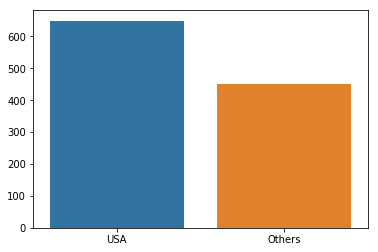

In [8]:
sns.barplot(data =data_USA_and_other_countries, x= "Country", y="total")

In [9]:
fraction_golden_medal_USA=(golden_medal_USA/total_golden_medal).round(2)*100
print(f'USA got {fraction_golden_medal_USA} % of all golden medals')


USA got 59.0 % of all golden medals


### But, who are the others countries??

In [10]:
selection = golden_medal['Country'] == 'USA'

In [11]:
golden_medal_other_countries = golden_medal[~selection]


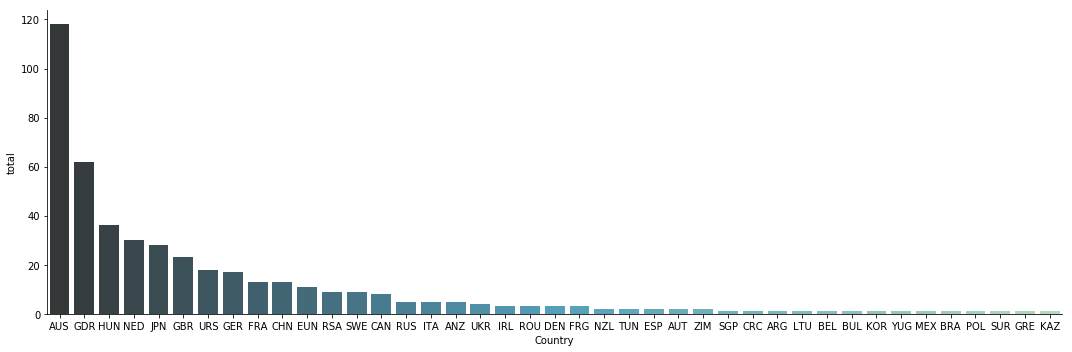

In [12]:
sns.catplot(x= "Country",y='total',data = golden_medal_other_countries,kind='bar',aspect =3,
           palette="GnBu_d",
           )
#sns.barplot(data =golden_medal_other_countries, x= "Country", y="total")

Australia is the second country which won more golden medals, then came German Democratic Republic with 62 golden medals and at third place, Hungary with 36 golden medals. However, if we join the result of GDR with GER we obtain the figure belong to the next section.

## Join GDR + GER

In [13]:
loc_GDR = golden_medal.query("Country=='GDR'").total.index
loc_GER = golden_medal.query("Country=='GER'").total.index
golden_medal_aux = golden_medal
golden_medal_aux.loc[loc_GER[0],'total'] = golden_medal.loc[loc_GER[0],'total'] + golden_medal.loc[loc_GDR[0],'total']


In [14]:
golden_medal_without_GDR = golden_medal_aux.drop(2,axis=0)



In [15]:
golden_medal_without_GDR.sort_values(by='total',ascending=False,inplace=True)
golden_medal_without_GDR.index = range(golden_medal_without_GDR.shape[0])

/home/carol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


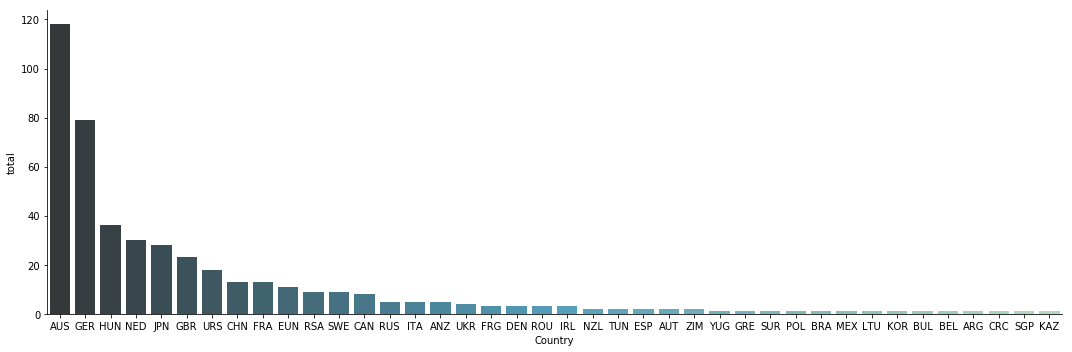

In [16]:
golden_medal_without_GDR_USA = golden_medal_without_GDR[~selection]

sns.catplot(x= "Country",y='total',data = golden_medal_without_GDR_USA,kind='bar',aspect =3,
           palette="GnBu_d",
           )